In [22]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table, vstack
import hdbscan
from pathlib import Path
import seaborn as sns
import glob
import json
%matplotlib inline
sns.set_color_codes()

In [23]:
ROOT_PATH = Path("..") 

In [24]:
table1 = Table.read(ROOT_PATH / "Halpha-DR3_errorsall_flagallf_r16.ecsv", format="ascii.ecsv")
table2 = Table.read(ROOT_PATH / "Halpha-DR3_errorsall_flagallf_16r18.ecsv", format="ascii.ecsv")
table3 = Table.read(ROOT_PATH / "Halpha-DR3_errorsall_flagallf_18r20.ecsv", format="ascii.ecsv")
table4 = Table.read(ROOT_PATH / "Halpha-DR3_errorsall_flagallf_20r21.ecsv", format="ascii.ecsv")

In [25]:
# Merge tall four tables
table_merge = vstack([table1, table2, table3, table4])

In [26]:
# Making the colors
# definition for the colors
def colour(table, f1, f2, f3, f4):
    xcolour = table[f1] - table[f2]
    ycolour = table[f3] - table[f4]
    return xcolour, ycolour

In [53]:
cx, cy = colour(table_merge, "R_PStotal", "I_PStotal", "R_PStotal", "F660_PStotal")
table_merge.colnames

['Unnamed: 0',
 'Field',
 'ID',
 'RA',
 'DEC',
 'FWHM',
 'ISOarea',
 'KRON_RADIUS',
 'nDet_magPStotal',
 'PhotoFlagDet',
 'U_PStotal',
 'F378_PStotal',
 'F395_PStotal',
 'F410_PStotal',
 'F430_PStotal',
 'G_PStotal',
 'F515_PStotal',
 'R_PStotal',
 'F660_PStotal',
 'I_PStotal',
 'F861_PStotal',
 'Z_PStotal',
 'e_U_PStotal',
 'e_F378_PStotal',
 'e_F395_PStotal',
 'e_F410_PStotal',
 'e_F430_PStotal',
 'e_G_PStotal',
 'e_F515_PStotal',
 'e_R_PStotal',
 'e_F660_PStotal',
 'e_I_PStotal',
 'e_F861_PStotal',
 'e_Z_PStotal',
 'r - i',
 'r - Halpha',
 'e(r - i)',
 'e(r - Halpha)']

In [28]:
# Reading the json files with synthectic photometry of the star library Pickles, A. J. (1998)
def filter_mag(e, s, f1, f2, f3):
    '''
    Calculate the colors using any of set of filters
    '''
    col, col0 = [], []
    if data['id'].endswith(e):
        if data['id'].startswith(str(s)):
            filter1 = data[f1]
            filter2 = data[f2]
            filter3 = data[f3]
            diff = filter1 - filter2
            diff0 = filter1 - filter3
            col.append(diff)
            col0.append(diff0)
    
    return col, col0

def plot_mag(f1, f2, f3):
    x, y = filter_mag("Star", "", f1, f2, f3)
    for a, b in zip(x, y):
        A1.append(a)
        B1.append(b)

In [29]:
A1, B1 = [], []

pattern = "../../MS_stars/*.json"
file_list = glob.glob(pattern)

for file_name in file_list:
    with open(file_name) as f:
        data = json.load(f)
        plot_mag("F0626_rSDSS", "F0660", "F0769_iSDSS")
len(A1)

174

Plotting the results

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


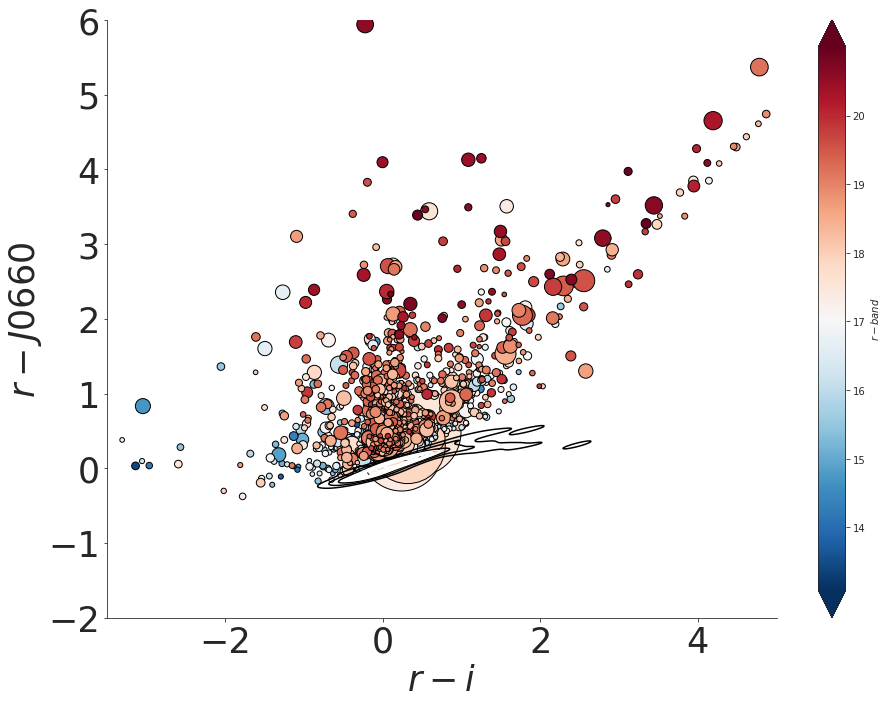

In [30]:
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.xlabel(r"$r - i$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)
    scat = ax.scatter(cx, cy, s=10*table_merge["FWHM"], edgecolor='black',
                             c=table_merge["R_PStotal"], zorder = 2, cmap='RdBu_r')
    #pal = sns.dark_palette("magma", as_cmap=True)
    #pal = sns.cubehelix_palette(as_cmap=True)
    pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
    #pal = sns.color_palette("Paired", 19, as_cmap=True)
    #pal = sns.color_palette("bright")
    ax = sns.kdeplot(B1, A1, zorder = 2, cmap=pal);
    #ax2.plot(fit_line, 0.42917 * fit_line - 0.04333, color="k", ls="--")
    ax.set(
      xlim=[-3.5, 5.],
      ylim=[-2.0, 6.])
    fig.colorbar(scat,extend='both', ax=ax).set_label("$r-band$")
    #ax.set_aspect("equal")
    #ax.set_title(r"(r - J0660) vs (r - i)")

In [31]:
cx1, cy1 = colour(table_merge, "G_PStotal", "I_PStotal", "G_PStotal", "F660_PStotal")


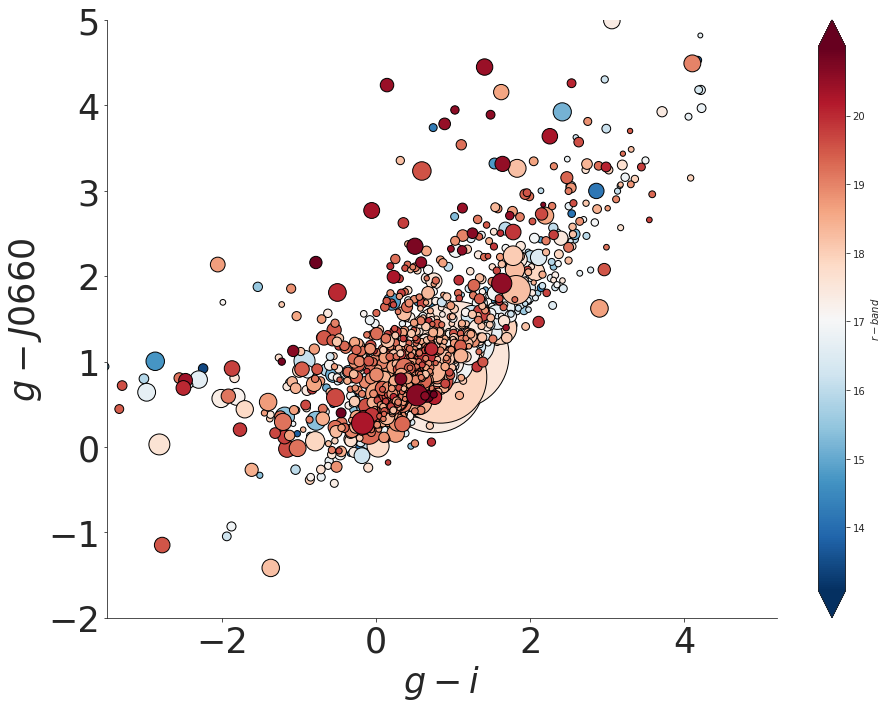

In [32]:
with sns.axes_style("ticks"):
    fig, ax1 = plt.subplots(figsize=(15, 11))
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False)
    plt.xlabel(r"$g - i$", fontsize=35)
    plt.ylabel(r"$g - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)
    scat = ax1.scatter(cx1, cy1, s=15*table_merge["FWHM"], edgecolor='black',
                             c=table_merge["R_PStotal"], cmap='RdBu_r')
    #ax2.plot(fit_line, 0.42917 * fit_line - 0.04333, color="k", ls="--")
    ax1.set(
      xlim=[-3.5, 5.2],
      ylim=[-2.0, 5.])
    fig.colorbar(scat,extend='both', ax=ax1).set_label("$r-band$")
    #ax.set_aspect("equal")
    #ax.set_title(r"(r - J0660) vs (r - i)")

# Histograms, KDE, and densities

 Histograms and KDE can be combined using distplot:

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


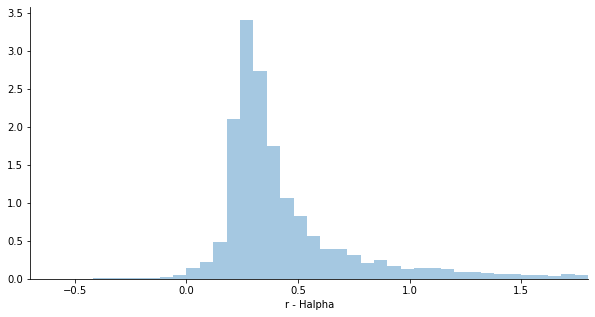

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - Halpha"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

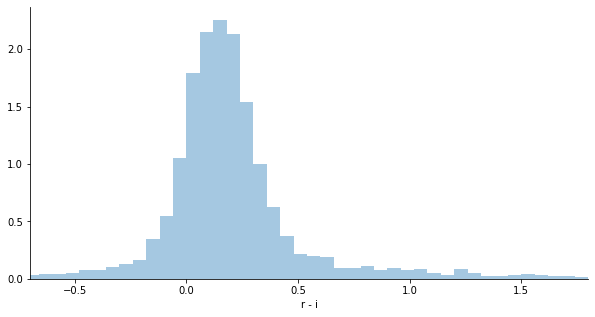

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - i"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


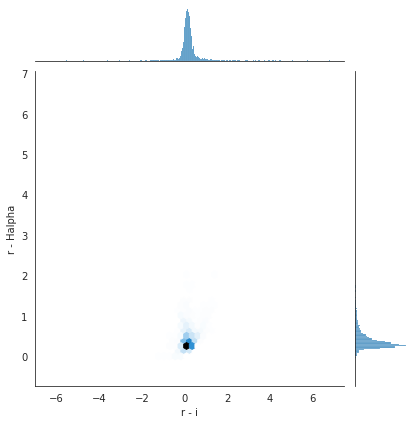

In [35]:
import matplotlib.pyplot as plt
with sns.axes_style('white'):
    sns.jointplot(table_merge["r - i"], table_merge["r - Halpha"], kind='hex')

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


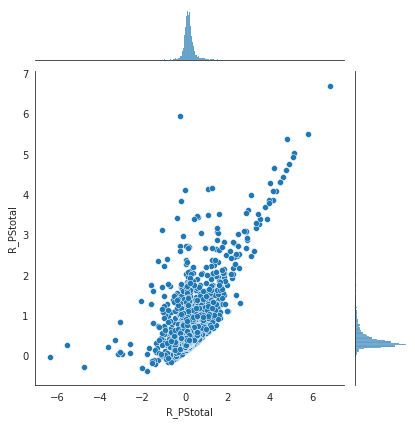

In [36]:
with sns.axes_style('white'):
    sns.jointplot(cx, cy)#, data, kind='kde');

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_PStotal', ylabel='Density'>

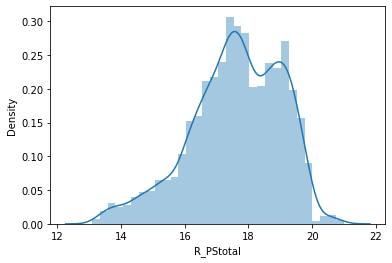

In [37]:
sns.distplot(table_merge["R_PStotal"])

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='r - i', ylabel='Density'>

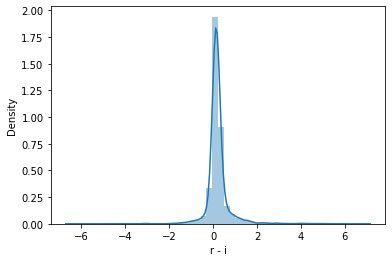

In [38]:
sns.distplot(table_merge["r - i"])

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='r - Halpha', ylabel='Density'>

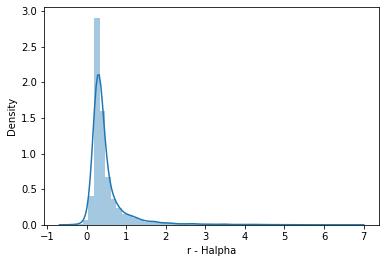

In [39]:
sns.distplot(table_merge["r - Halpha"])

In [40]:
df_merge = table_merge.to_pandas()
df_merge.describe()

,Unnamed: 0,RA,DEC,FWHM,ISOarea,KRON_RADIUS,nDet_magPStotal,PhotoFlagDet,U_PStotal,F378_PStotal,...,e_F515_PStotal,e_R_PStotal,e_F660_PStotal,e_I_PStotal,e_F861_PStotal,e_Z_PStotal,r - i,r - Halpha,e(r - i),e(r - Halpha)
count,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.0,4109.000000,4109.000000,4109.000000,...,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000
mean,90718.199562,189.499866,-20.594486,5.828166,314.166707,3.718888,12.0,0.921392,19.087110,18.734284,...,0.033607,0.014361,0.011594,0.016130,0.028229,0.025586,0.214829,0.509457,0.021982,0.018740
std,116177.938166,101.403675,16.376053,19.241525,1342.180856,0.705803,0.0,1.169809,1.195029,1.202583,...,0.028023,0.012829,0.008635,0.016096,0.030130,0.029031,0.567011,0.545851,0.020171,0.015120
min,6.000000,0.496892,-59.890768,1.047645,9.000000,0.000000,12.0,0.000000,13.882533,13.910707,...,0.001780,0.001020,0.001005,0.001002,0.001223,0.001002,-6.376337,-0.375387,0.001442,0.001461
25%,19422.000000,151.780079,-34.168274,2.434504,50.000000,3.270275,12.0,0.000000,18.490232,18.116394,...,0.013877,0.005710,0.005293,0.005160,0.008003,0.006544,0.043340,0.259409,0.007933,0.007929
50%,53587.000000,163.018606,-23.548087,3.114677,96.000000,3.636054,12.0,0.000000,19.323446,18.967438,...,0.024729,0.010124,0.008961,0.010026,0.016508,0.013960,0.156810,0.339741,0.014649,0.013893
75%,108419.000000,302.767058,-0.972067,4.991546,216.000000,4.089933,12.0,2.000000,19.932056,19.615294,...,0.044747,0.020135,0.015794,0.022368,0.036877,0.034070,0.287791,0.523632,0.031150,0.026261
max,671304.000000,359.343028,5.922446,775.388600,42572.000000,13.685701,12.0,19.000000,21.525307,21.001234,...,0.178565,0.155837,0.063005,0.197133,0.196310,0.197433,6.827015,6.695283,0.209138,0.155848


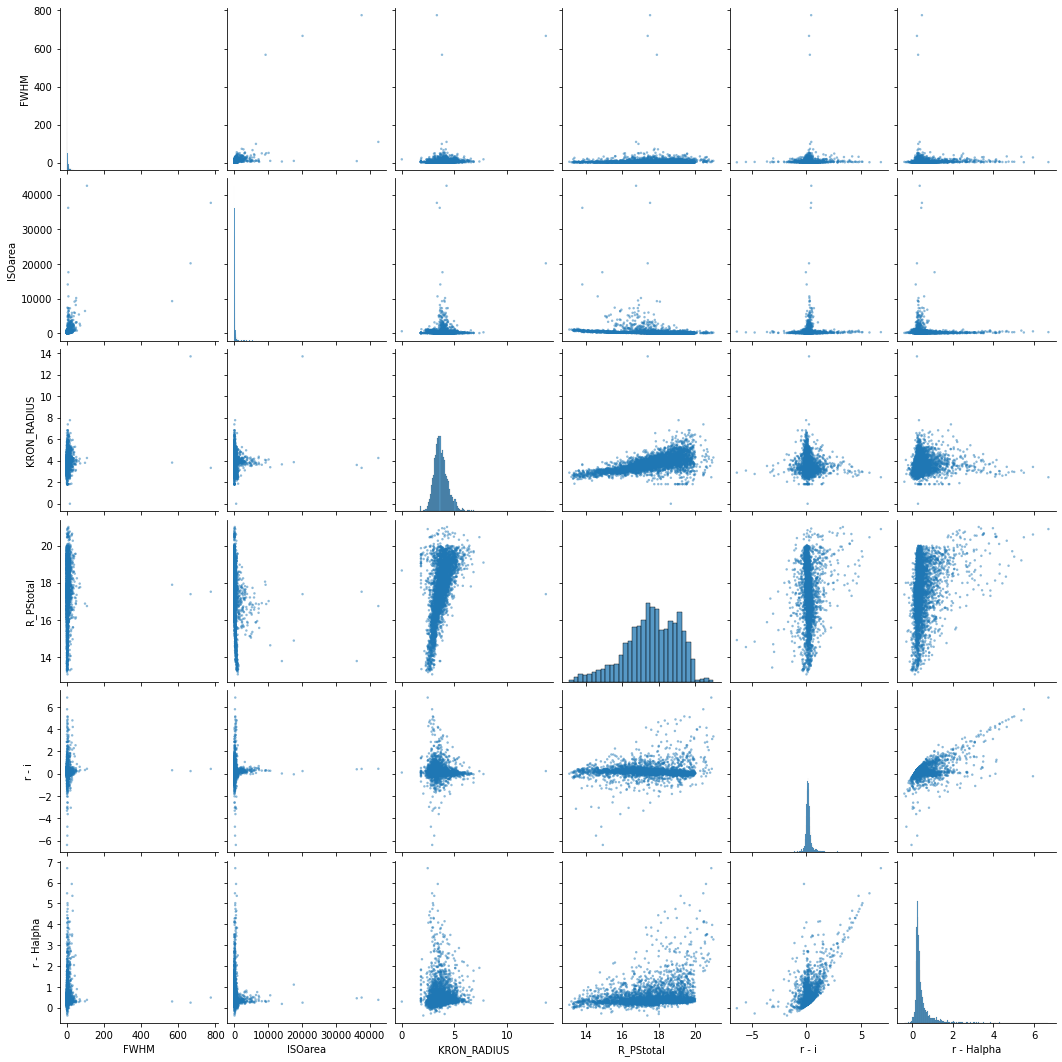

In [51]:
sns.pairplot(df_merge, 
             vars=['FWHM', 'ISOarea', 'KRON_RADIUS', 'R_PStotal', 'r - i', 'r - Halpha'],
             plot_kws=dict(alpha=0.5, s=6, edgecolor='none'), 
             diag_kind='hist', palette='RdBu_r'
            )

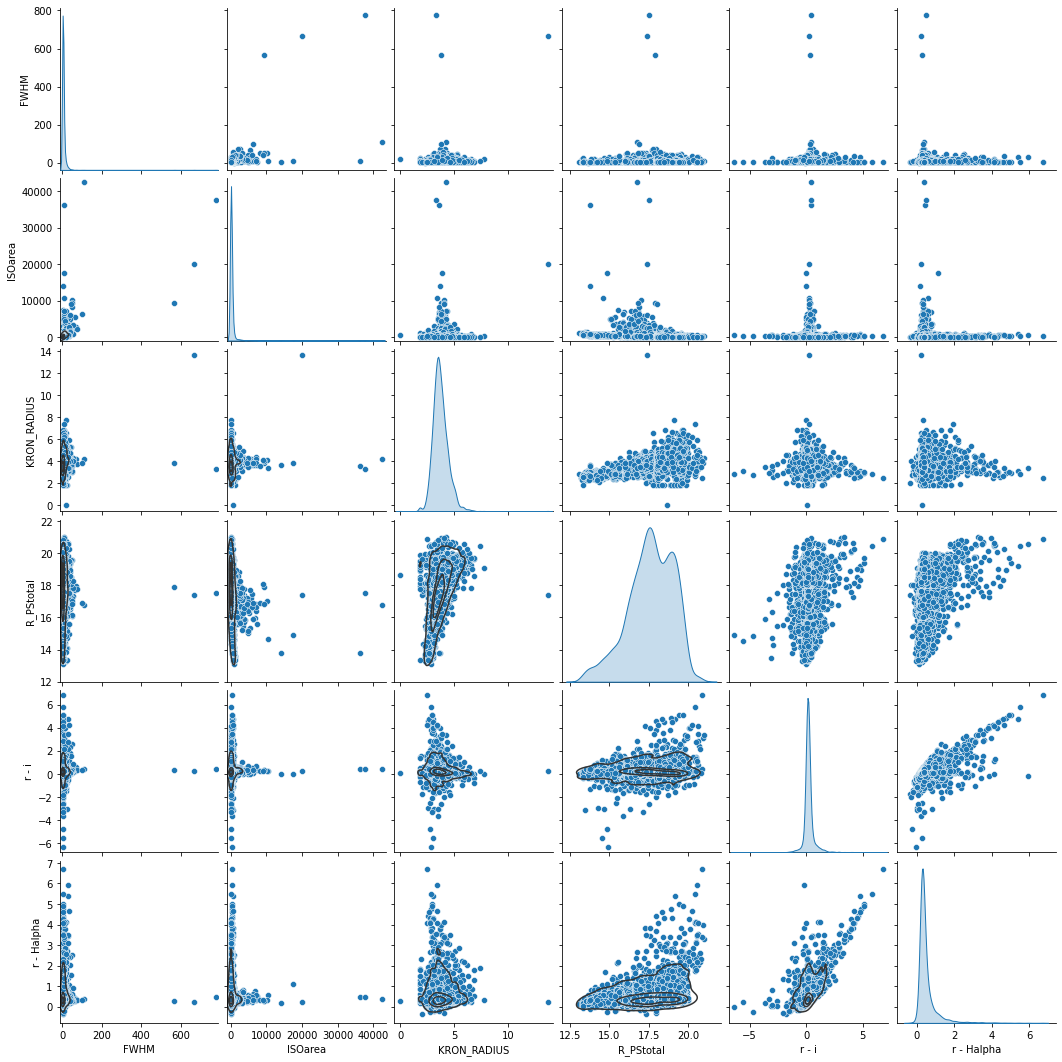

In [52]:
g = sns.pairplot(df_merge, vars=['FWHM', 'ISOarea', 'KRON_RADIUS', 'R_PStotal', 'r - i', 'r - Halpha'],
                 diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
